Ridge Regression
===

* Este modelo impone una penalización al tamaño de los coeficientes.

* Los coeficientes del modelo minimizan la suma penalizada de residuales al cuadrado:
$$
\min_w ||Xw -y||_2^2 + \alpha ||w||_2^2
$$
con $\alpha \ge 0$

* La penalización se aplica únicamente sobre los coeficientes de $x$.

In [1]:
from sklearn.datasets import make_regression

X, y_true = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    bias=100.0,
    tail_strength=0.9,
    noise=12.0,
    shuffle=False,
    coef=False,
    random_state=0,
)

In [2]:
from sklearn.linear_model import Ridge


def predict(X, y_true, line_X, alpha):

    ridge = Ridge(
        # ---------------------------------------------------------------------
        # Constant that multiplies the L2 term, controlling regularization
        # strength. alpha must be a non-negative float. When alpha = 0, the
        # objective is equivalent to ordinary least squares, solved by the
        # LinearRegression object.
        #
        alpha=alpha,
        # ---------------------------------------------------------------------
        # Whether to fit the intercept for this model.
        fit_intercept=True,
        # ---------------------------------------------------------------------
        # Maximum number of iterations for conjugate gradient solver.
        max_iter=None,
        # ---------------------------------------------------------------------
        # Precision of the solution. Note that tol has no effect for solvers
        # ‘svd’ and ‘cholesky’.
        tol=1e-4,
        # ---------------------------------------------------------------------
        # Solver to use in the computational routines:
        # * ‘auto’ chooses the solver automatically based on the type of data.
        # * 'svd'
        # * 'cholesky'
        # * 'sparse_cg'
        # * 'lsqr':  regularized least-square
        # * 'sag': Stochastic Average Gradient
        # * 'lbfgs'
        solver="auto",
        # ---------------------------------------------------------------------
        # When set to True, forces the coefficients to be positive.
        positive=False,
        # ---------------------------------------------------------------------
        # Used when solver == ‘sag’ or ‘saga’ to shuffle the data.
        random_state=None,
    )

    ridge.fit(X, y_true)
    y_predicted = ridge.predict(line_X)

    # Main attributes:
    print(ridge.coef_)
    print(ridge.intercept_)

    return y_predicted

In [3]:
import matplotlib.pyplot as plt
import numpy as np


def plot(X, y_true, alpha):

    line_X = np.linspace(X.min(), X.max())[:, np.newaxis]

    plt.figure(figsize=(3.5, 3.5))
    plt.scatter(X, y_true, color="tab:blue", alpha=0.8, edgecolors="white")
    plt.plot(line_X, predict(X, y_true, line_X, alpha), "k", linewidth=2)
    plt.title("alpha =" + str(alpha))

[42.66621538]
99.02298180756313


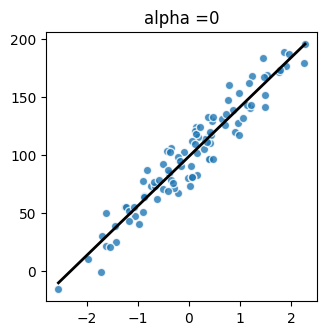

In [4]:
plot(X, y_true, 0)

[21.50059777]
100.28885539402634


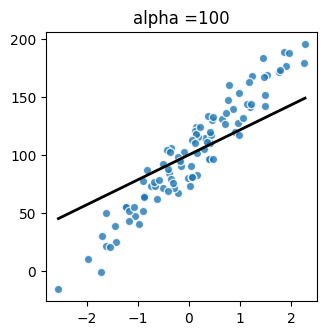

In [5]:
plot(X, y_true, 100)

[0.42905631]
101.54910247355808


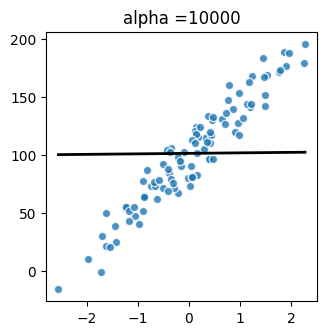

In [6]:
plot(X, y_true, 10000)